<a href="https://colab.research.google.com/github/Matthew0803/Machine-Learning-/blob/main/Google%20Colab/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("U4_04_train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

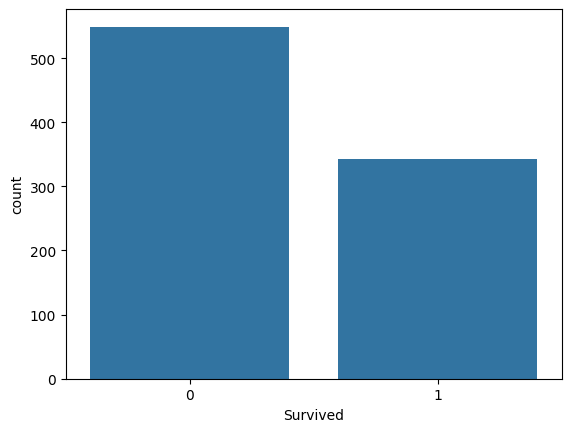

In [ ]:
import seaborn as sns
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

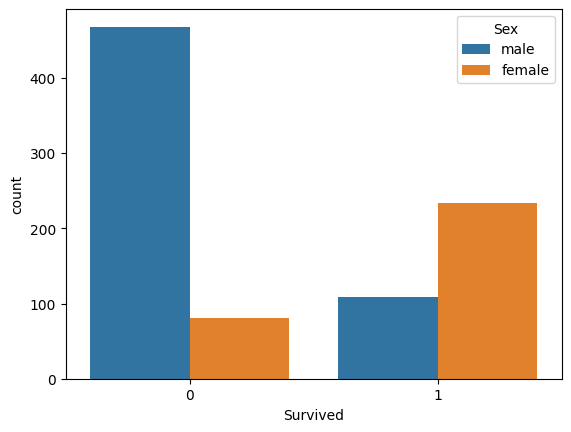

In [ ]:
sns.countplot(x="Survived",data=data,hue="Sex")

In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


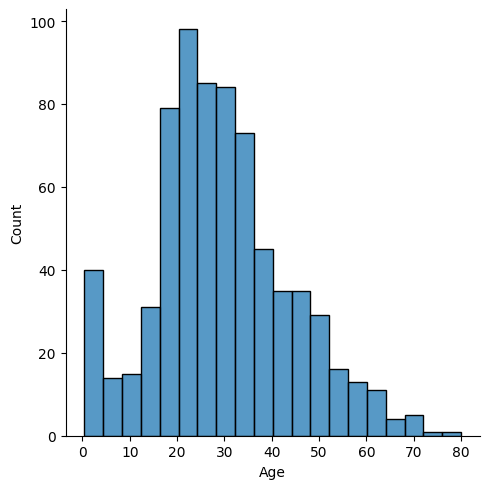

In [ ]:
sns.displot(x="Age",data=data)

In [ ]:
data['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
data['Age'].mean()

29.69911764705882

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data = data.drop('Cabin',axis=1)

In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data = data.drop(['Name','PassengerId','Ticket'],axis=1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
dummies_sex = pd.get_dummies(data['Sex'],dtype=int, drop_first=True)
#drop_first prevents multicollinearity

In [ ]:
data = data.join(dummies_sex)
data = data.drop('Sex',axis=1)

<Axes: xlabel='Survived', ylabel='count'>

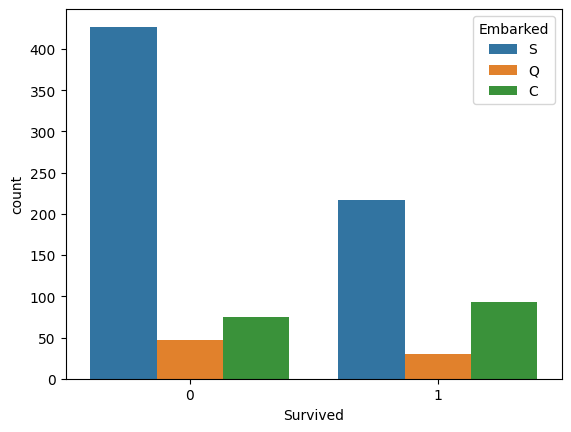

In [ ]:
sns.countplot(x='Survived',data=data,hue='Embarked')

In [ ]:
dummies_embarked = pd.get_dummies(data['Embarked'],dtype=int, drop_first=True)

In [ ]:
data = data.join(dummies_embarked)
data = data.drop('Embarked',axis=1)

In [ ]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

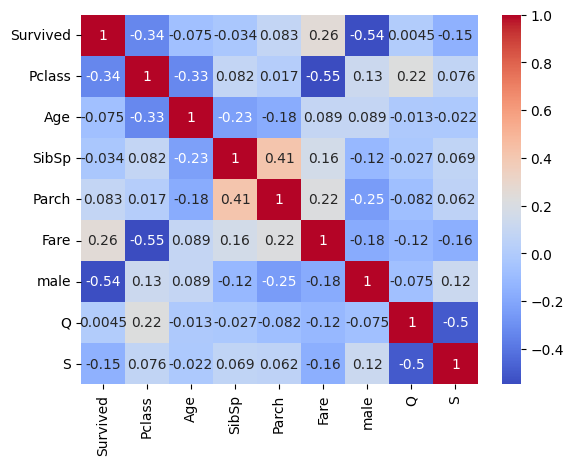

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

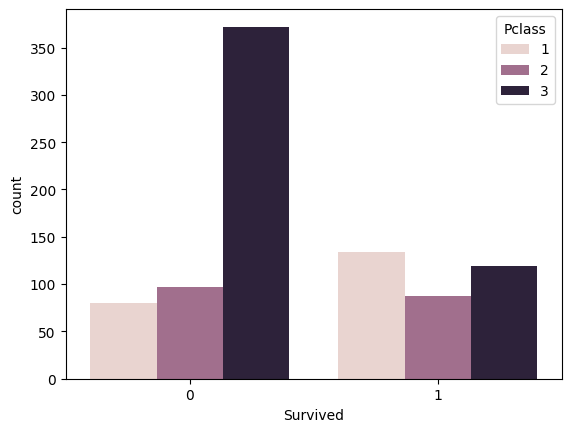

In [ ]:
sns.countplot(x='Survived',data=data,hue='Pclass')

In [ ]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.848314606741573

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1,20):
  model = DecisionTreeClassifier(max_depth=10)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)



In [ ]:
from sklearn.metrics import accuracy_score
for i in range(1,50):
  q = accuracy_score(y_test,y_pred)
  print(q)


0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742
0.7921348314606742


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.74      0.81      0.77        68

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[91, 19],
       [13, 55]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,91,19
Actual Yes,13,55


In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
new_person = [3,35,0,0,10,1,0,0]
predictions = model.predict([new_person])
if predictions[0] == 1:
    print("Survived")
else:
    print("Not Survived")

Not Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
